# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Shafira Maulidina
- **Email:** shafiramaulidinaa@gmail.com
- **ID Dicoding:** MC009D5X2455

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana pengaruh kondisi cuaca terhadap jumlah penggunaan sepeda pada berbagai jam dalam sehari?
- Pertanyaan 2 : Bagaimana distribusi penyewaan sepeda berdasarkan tipe penyewa?

## Import Semua Packages/Library yang Digunakan

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

## Data Wrangling

### Gathering Data

In [ ]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [ ]:
day_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
day_df.isna().sum()


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [ ]:
print("Jumlah duplikasi: ",day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
day_df.describe()


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
hour_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
hour_df.isna().sum()


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [ ]:
print("Jumlah duplikasi: ",hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
hour_df.describe()


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

mengganti nama kolom

In [ ]:
day_df.rename(columns={
    "dteday": "date",
    "yr": "year",
    "mnth": "month",
}, inplace=True)

hour_df.rename(columns={
    "dteday": "date",
    "yr": "year",
    "hr": "hour",
    "mnth": "month",
}, inplace=True)

menghapus kolom instan

In [ ]:
day_df.drop(columns=['instant'], inplace=True)
hour_df.drop(columns=['instant'], inplace=True)

In [ ]:
categorical_cols = ['season', 'year', 'month']
day_df[categorical_cols] = day_df[categorical_cols].astype('category')
hour_df[categorical_cols] = hour_df[categorical_cols].astype('category')

In [ ]:
day_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   date        731 non-null    object  
 1   season      731 non-null    category
 2   year        731 non-null    category
 3   month       731 non-null    category
 4   holiday     731 non-null    int64   
 5   weekday     731 non-null    int64   
 6   workingday  731 non-null    int64   
 7   weathersit  731 non-null    int64   
 8   temp        731 non-null    float64 
 9   atemp       731 non-null    float64 
 10  hum         731 non-null    float64 
 11  windspeed   731 non-null    float64 
 12  casual      731 non-null    int64   
 13  registered  731 non-null    int64   
 14  cnt         731 non-null    int64   
dtypes: category(3), float64(4), int64(7), object(1)
memory usage: 71.5+ KB


In [ ]:
hour_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   date        17379 non-null  object  
 1   season      17379 non-null  category
 2   year        17379 non-null  category
 3   month       17379 non-null  category
 4   hour        17379 non-null  int64   
 5   holiday     17379 non-null  int64   
 6   weekday     17379 non-null  int64   
 7   workingday  17379 non-null  int64   
 8   weathersit  17379 non-null  int64   
 9   temp        17379 non-null  float64 
 10  atemp       17379 non-null  float64 
 11  hum         17379 non-null  float64 
 12  windspeed   17379 non-null  float64 
 13  casual      17379 non-null  int64   
 14  registered  17379 non-null  int64   
 15  cnt         17379 non-null  int64   
dtypes: category(3), float64(4), int64(8), object(1)
memory usage: 1.8+ MB


In [ ]:
map = {
      'season': {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'},
      'year':   {0: '2011', 1: '2012'},
      'month':  {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
                 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'},
}

for col, mapping in map.items():
    day_df[col] = day_df[col].map(mapping)
    hour_df[col] = hour_df[col].map(mapping)

In [ ]:
day_df.head()


,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,NaN,NaN,NaN,No Holiday,Saturday,No,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,NaN,NaN,NaN,No Holiday,Sunday,No,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,NaN,NaN,NaN,No Holiday,Monday,Yes,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,NaN,NaN,NaN,No Holiday,Tuesday,Yes,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,NaN,NaN,NaN,No Holiday,Wednesday,Yes,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
hour_df.head()


,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,NaN,NaN,NaN,0,No Holiday,Saturday,No,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,NaN,NaN,NaN,1,No Holiday,Saturday,No,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,NaN,NaN,NaN,2,No Holiday,Saturday,No,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,NaN,NaN,NaN,3,No Holiday,Saturday,No,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,NaN,NaN,NaN,4,No Holiday,Saturday,No,1,0.24,0.2879,0.75,0.0,0,1,1


## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
day_df.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [ ]:
hour_df.describe(include="all")


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [ ]:
day_df.groupby('yr').agg({
      'cnt': ['max', 'min', 'mean', 'sum']
      })

cnt                           
     max  min         mean      sum
yr                                 
0   6043  431  3405.761644  1243103
1   8714   22  5599.934426  2049576

In [ ]:
day_df.groupby('holiday').agg({
      'cnt': ['max', 'min', 'mean', 'sum']
      })

cnt                            
          max   min         mean      sum
holiday                                  
0        8714    22  4527.104225  3214244
1        7403  1000  3735.000000    78435

In [ ]:
day_df.groupby('weekday').agg({
      'cnt': ['max', 'min', 'mean']
      })

cnt                   
          max   min         mean
weekday                         
0        8227   605  4228.828571
1        7525    22  4338.123810
2        7767   683  4510.663462
3        8173   441  4548.538462
4        7804   431  4667.259615
5        8362  1167  4690.288462
6        8714   627  4550.542857

In [ ]:
hour_df.groupby('mnth').agg({
      'cnt': ['max', 'min', 'mean', 'sum']
      })

cnt                        
      max min        mean     sum
mnth                             
1     559   1   94.424773  134933
2     610   1  112.865026  151352
3     957   1  155.410726  228920
4     822   1  187.260960  269094
5     873   1  222.907258  331686
6     900   1  240.515278  346342
7     913   1  231.819892  344948
8     941   1  238.097627  351194
9     977   1  240.773138  345991
10    963   1  222.158511  322352
11    729   1  177.335421  254831
12    759   1  142.303439  211036

In [ ]:
hour_df.groupby('workingday').agg({
      'cnt': ['max', 'min', 'mean', 'sum']
      })

cnt                         
            max min        mean      sum
workingday                              
0           783   1  181.405332  1000269
1           977   1  193.207754  2292410

In [ ]:
hour_df.groupby('weathersit').agg({
      'cnt': ['max', 'min', 'mean', 'sum']
      })

cnt                         
            max min        mean      sum
weathersit                              
1           977   1  204.869272  2338173
2           957   1  175.165493   795952
3           891   1  111.579281   158331
4           164  23   74.333333      223

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh kondisi cuaca terhadap jumlah penggunaan sepeda pada berbagai jam dalam sehari?

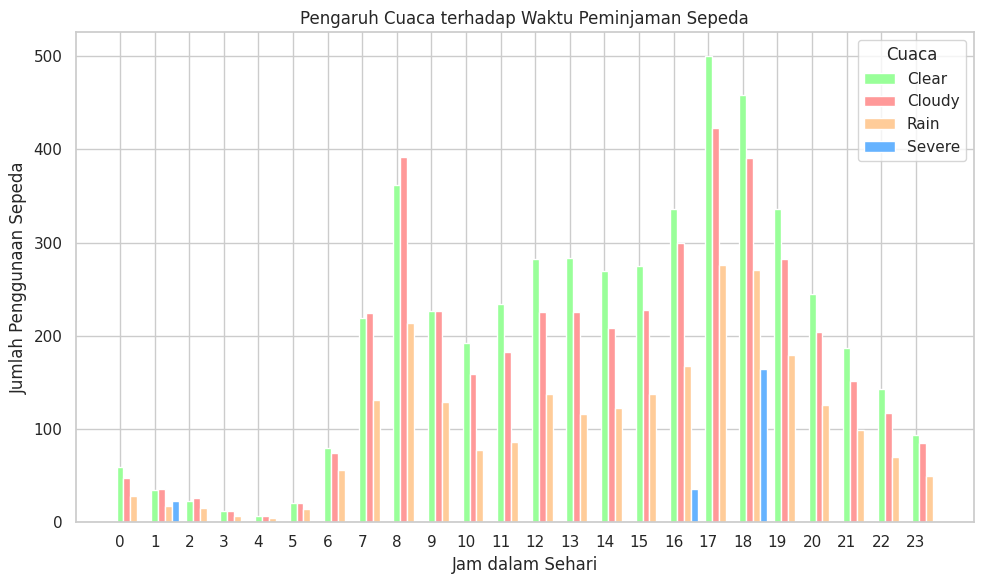

In [31]:
sns.set(style="whitegrid")

weather_avg = hour_df.groupby(['hr', 'weathersit'])['cnt'].mean().reset_index()

weather_avg['weathersit'] = weather_avg['weathersit'].map({
    1: 'Clear',
    2: 'Cloudy',
    3: 'Rain',
    4: 'Severe'
})

plt.figure(figsize=(10, 6))

colors = ['#99ff99', '#ff9999', '#ffcc99', '#66b3ff']

for i, (name, group) in enumerate(weather_avg.groupby('weathersit')):
            plt.bar(group['hr'] + i * 0.2, group['cnt'], width=0.2, label=name, color=colors[i])

plt.title('Pengaruh Cuaca terhadap Waktu Peminjaman Sepeda')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Jumlah Penggunaan Sepeda')
plt.xticks(range(0, 24))
plt.legend(title='Cuaca')

plt.tight_layout()

plt.show()

### Pertanyaan 2: Bagaimana distribusi penyewaan sepeda berdasarkan tipe penyewa?

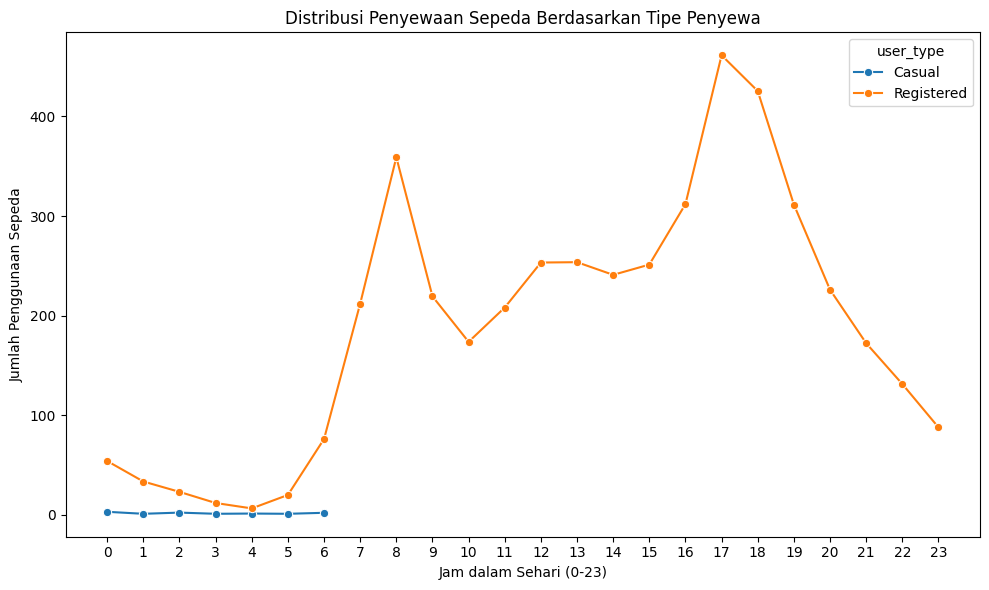

In [ ]:
hour_df['user_type'] = hour_df['registered'].apply(lambda x: 'Registered' if x > 0 else 'Casual')

user_type_avg = hour_df.groupby(['hr', 'user_type'])['cnt'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='hr', y='cnt', hue='user_type', data=user_type_avg, marker='o')
plt.title('Distribusi Penyewaan Sepeda Berdasarkan Tipe Penyewa')
plt.xlabel('Jam dalam Sehari (0-23)')
plt.ylabel('Jumlah Penggunaan Sepeda')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()


## Analisis Lanjutan (Opsional)

Analisis lanjutan pengaruh holiday terhadap bulan peminjaman?

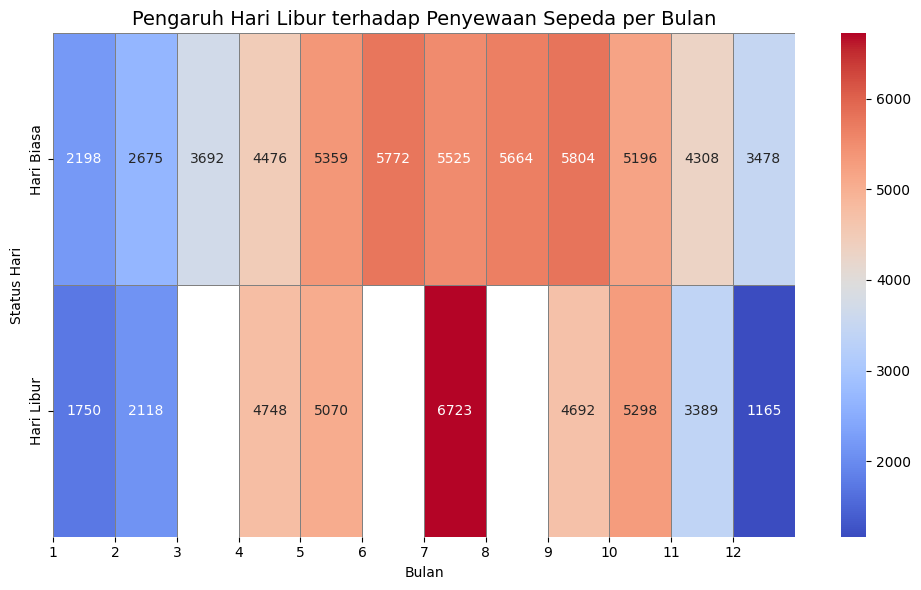

In [ ]:
day_df['month'] = pd.to_datetime(day_df['dteday']).dt.month
day_holiday_avg = day_df.groupby(['holiday', 'month'])['cnt'].mean().reset_index()

day_holiday_avg['holiday'] = day_holiday_avg['holiday'].map({1: 'Hari Libur', 0: 'Hari Biasa'})

plt.figure(figsize=(10, 6))
heatmap_data = day_holiday_avg.pivot(index='holiday', columns='month', values='cnt')
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='.0f', linewidths=0.5, linecolor='gray')

plt.title('Pengaruh Hari Libur terhadap Penyewaan Sepeda per Bulan', fontsize=14)
plt.xlabel('Bulan')
plt.ylabel('Status Hari')
plt.xticks(range(0, 12), labels=range(1, 13))
plt.tight_layout()
plt.show()


Analisis lanjutan pengaruh weathersit terhadap waktu peminjaman?

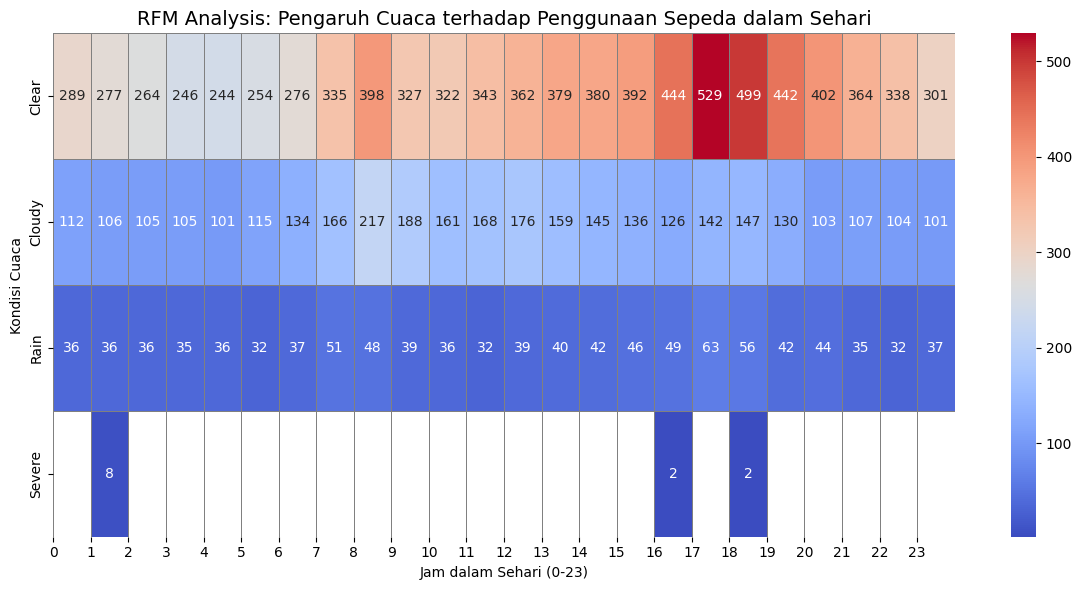

In [ ]:
hour_df['weathersit'] = hour_df['weathersit'].map({
    1: 'Clear',
    2: 'Cloudy',
    3: 'Rain',
    4: 'Severe'
})

rfm_weather = hour_df.groupby(['hr', 'weathersit']).agg(
    recency=('hr', 'max'),
    frequency=('cnt', 'count'),
    monetary=('cnt', 'sum')
).reset_index()

rfm_weather['recency'] = rfm_weather['recency'].max() - rfm_weather['recency']

scaler = MinMaxScaler(feature_range=(0, 24))
rfm_weather[['recency']] = scaler.fit_transform(rfm_weather[['recency']])
scaler = MinMaxScaler(feature_range=(0, 800))
rfm_weather[['frequency', 'monetary']] = scaler.fit_transform(rfm_weather[['frequency', 'monetary']])

rfm_weather['RFM_Score'] = ((rfm_weather['recency'] +
                             rfm_weather['frequency'] +
                             rfm_weather['monetary']) / 3).round(0)

plt.figure(figsize=(12, 6))
heatmap_data = rfm_weather.pivot(index='weathersit', columns='hr', values='RFM_Score')
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='.0f', linewidths=0.5, linecolor='gray')

plt.title('RFM Analysis: Pengaruh Cuaca terhadap Penggunaan Sepeda dalam Sehari', fontsize=14)
plt.xlabel('Jam dalam Sehari (0-23)')
plt.ylabel('Kondisi Cuaca')
plt.xticks(range(0, 24), labels=range(0, 24))
plt.tight_layout()
plt.show()

## Conclusion

- Conclution pertanyaan 1 : Bagaimana pengaruh kondisi cuaca terhadap jumlah penggunaan sepeda pada berbagai jam dalam sehari?

Kondisi cuaca memiliki dampak yang besar terhadap pola penggunaan sepeda sepanjang hari. Berdasarkan analisis data, penggunaan sepeda paling tinggi terjadi saat cuaca cerah (Clear), terutama pada jam-jam sibuk pagi (sekitar pukul 07.00 - 09.00) dan sore hari (sekitar pukul 17.00 - 19.00). Pola ini menunjukkan bahwa banyak orang memilih sepeda sebagai moda transportasi utama untuk berangkat dan pulang kerja atau sekolah ketika cuaca mendukung.  

Sebaliknya, saat cuaca kurang mendukung, seperti berawan (Cloudy), hujan (Rain), atau kondisi ekstrem (Severe), jumlah penggunaan sepeda mengalami penurunan yang signifikan. Pada kondisi hujan, peminjaman sepeda berkurang, sementara dalam cuaca ekstrem, hampir tidak ada aktivitas bersepeda. Hal ini menunjukkan bahwa pengguna cenderung beralih ke transportasi lain atau mengurangi aktivitas di luar ruangan saat kondisi cuaca tidak ideal. Secara keseluruhan, kenyamanan dan keamanan yang dipengaruhi oleh cuaca menjadi faktor utama dalam menentukan tingkat penggunaan sepeda.


- Conclution pertanyaan 2 : Bagaimana distribusi penyewaan sepeda berdasarkan tipe penyewa?

Berdasarkan analisis data, terdapat perbedaan yang signifikan dalam pola penyewaan sepeda antara pengguna terdaftar (registered) dan pengguna santai (casual). Pengguna terdaftar menunjukkan pola penggunaan yang jelas, dengan dua puncak penyewaan yang terjadi pada pagi hari sekitar pukul 08:00 dan sore hari sekitar pukul 17:00 hingga 18:00. Pola ini menunjukkan bahwa pengguna terdaftar cenderung menggunakan sepeda sebagai alat transportasi utama, kemungkinan untuk perjalanan ke dan dari tempat kerja atau sekolah. Sebaliknya, pengguna santai memiliki tingkat penyewaan yang jauh lebih rendah dan distribusinya lebih merata sepanjang hari, tanpa lonjakan yang signifikan pada jam-jam tertentu. Hal ini mengindikasikan bahwa pengguna santai lebih banyak menggunakan sepeda untuk keperluan rekreasi atau kegiatan santai lainnya, yang tidak terikat pada jam sibuk. Secara keseluruhan, perbedaan pola ini menunjukkan bahwa faktor kebutuhan dan tujuan penggunaan sepeda sangat dipengaruhi oleh tipe penyewa.

